## We would like to predict the price of a used car depending on its specifications.

### Import the relevant libraries

In [84]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

### Import the raw data 

In [85]:
raw_data = pd.read_csv(r'C:\Users\ronni\OneDrive\Documents\Data Science Course\Part 4 (Jupyter)\Data Sets\1.04.+Real-life+example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4


### Explore the descriptive statistics of the variables

In [86]:
raw_data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.00,4345,4345.00,4195.00,4345,4345,4345.00,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.75,NaN,161.24,2.79,NaN,NaN,2006.55,NaN
std,NaN,25584.24,NaN,105.71,5.07,NaN,NaN,6.72,NaN
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00,NaN
25%,NaN,6999.00,NaN,86.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11500.00,NaN,155.00,2.20,NaN,NaN,2008.00,NaN
75%,NaN,21700.00,NaN,230.00,3.00,NaN,NaN,2012.00,NaN


Note: Each variable has a different number of observations. Meaning there are some missing values.

Note: There are 312 unique models, which are really hard to implement in a model. That would mean over 300 dummy variables.

Note: In the most common category we see that volkswagen has a frequency of 936. Registration however, has yes 3947. This means this variable won't be useful

### Dealing with missing values

Note: 'Price' and 'EngineV' do not have a total of 4345 values. Therefore there is missing data in these variables.

In [87]:
raw_data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

Rule of thumb: If you are removing < 5% of the observations, you are free to just remove all that have missing values

In [88]:
data_no_mv = raw_data.dropna(axis = 0)
data_no_mv.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.00,4025,4025.00,4025.00,4025,4025,4025.00,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.31,NaN,163.57,2.76,NaN,NaN,2006.38,NaN
std,NaN,25815.73,NaN,103.39,4.94,NaN,NaN,6.70,NaN
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00,NaN
25%,NaN,6999.00,NaN,90.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11500.00,NaN,158.00,2.20,NaN,NaN,2007.00,NaN
75%,NaN,21900.00,NaN,230.00,3.00,NaN,NaN,2012.00,NaN


### Exploring the PDFs

C:\Users\ronni\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

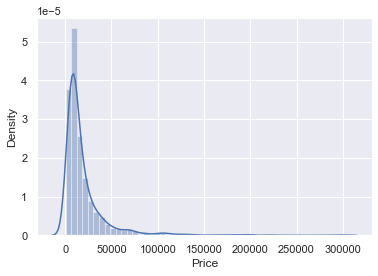

In [89]:
sns.distplot(data_no_mv['Price'])

Note: We are looking for a normal distribution but 'Price' Has an expenetial one. This will be a problem for our regression.

Note: Looking at the five number summary, We see that there is a huge gap between Q3 and max. Obviously we have a few outliers in the 'Price' variable.

Action: The way we will deal with outliers seemlessly is to remove top 1% of observarions.

### Dealing with outliers

In [90]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price'] < q]
data_1.describe(include  = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3984,3984.00,3984,3984.00,3984.00,3984,3984,3984.00,3984
unique,7,NaN,6,NaN,NaN,4,2,NaN,302
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN,188
mean,NaN,17837.12,NaN,165.12,2.74,NaN,NaN,2006.29,NaN
std,NaN,18976.27,NaN,102.77,4.96,NaN,NaN,6.67,NaN
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00,NaN
25%,NaN,6980.00,NaN,93.00,1.80,NaN,NaN,2002.75,NaN
50%,NaN,11400.00,NaN,160.00,2.20,NaN,NaN,2007.00,NaN
75%,NaN,21000.00,NaN,230.00,3.00,NaN,NaN,2011.00,NaN


C:\Users\ronni\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

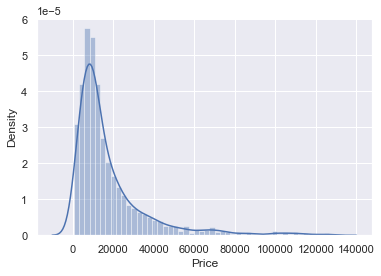

In [91]:
sns.distplot(data_1['Price'])

Note: This looks a lot better with less outliers

C:\Users\ronni\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

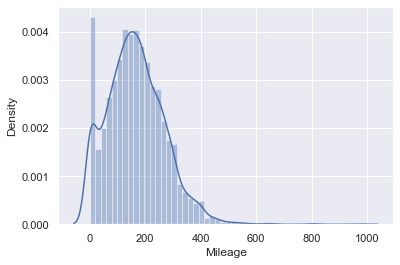

In [92]:
sns.distplot(data_1['Mileage'])

Note: We can see that the variable 'Mileage' has a similar issue and can be taken care of the same way as 'Price'

In [93]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage'] < q]
data_2.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3944,3944.00,3944,3944.00,3944.00,3944,3944,3944.00,3944
unique,7,NaN,6,NaN,NaN,4,2,NaN,299
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN,185
mean,NaN,17933.88,NaN,161.48,2.75,NaN,NaN,2006.39,NaN
std,NaN,19008.21,NaN,96.03,4.98,NaN,NaN,6.60,NaN
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00,NaN
25%,NaN,7000.00,NaN,92.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11500.00,NaN,158.00,2.20,NaN,NaN,2007.00,NaN
75%,NaN,21376.25,NaN,230.00,3.00,NaN,NaN,2011.00,NaN


C:\Users\ronni\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

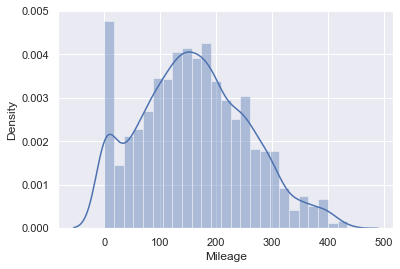

In [94]:
sns.distplot(data_2 ['Mileage'])

Note: We can clearly see by the five number summary and the distPlot that all outliers for 'Mileage' have been taken care of.

C:\Users\ronni\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

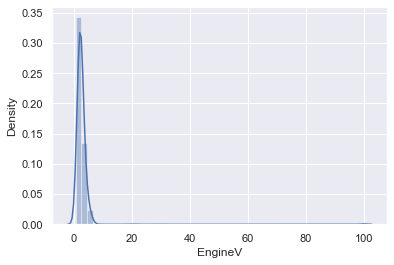

In [95]:
sns.distplot(data_2['EngineV'])

In [96]:
EngV = pd.DataFrame(raw_data['EngineV'])
EngV = EngV.dropna(axis = 0)
EngV.sort_values(by = 'EngineV')

,EngineV
2512,0.60
188,0.65
3295,1.00
2725,1.00
1923,1.00
...,...
1311,99.99
3114,99.99
1264,99.99
3641,99.99


Note: Alot of the values at the bottom of the list above are not usual values for Engine. A quick search on google tells us that the common values should range from 0.6 to 6.5. This means all values that are not in this interval are incorrect intries. A common way to label missing values is by assigning 99.99

Action: Lets remove all values that are > 6.5

In [97]:
data_3 = data_2[data_2['EngineV'] < 6.5]
data_3.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3921,3921.00,3921,3921.00,3921.00,3921,3921,3921.00,3921
unique,7,NaN,6,NaN,NaN,4,2,NaN,298
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,862,NaN,1499,NaN,NaN,1818,3559,NaN,185
mean,NaN,17988.42,NaN,161.28,2.44,NaN,NaN,2006.41,NaN
std,NaN,19041.66,NaN,96.07,0.95,NaN,NaN,6.60,NaN
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00,NaN
25%,NaN,7000.00,NaN,92.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11500.00,NaN,158.00,2.20,NaN,NaN,2008.00,NaN
75%,NaN,21500.00,NaN,229.00,3.00,NaN,NaN,2012.00,NaN


C:\Users\ronni\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

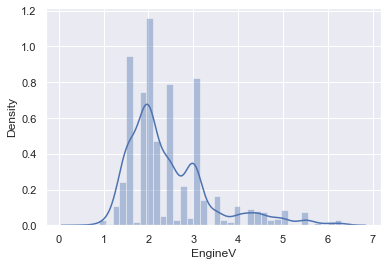

In [98]:
sns.distplot(data_3['EngineV'])

Note: we can see that the range in Engine size is now correct and that there are no incorrect values listed for 'EngineV'

C:\Users\ronni\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

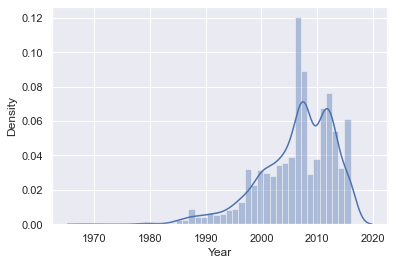

In [99]:
sns.distplot(data_3['Year'])

Note: We see that there are some vintage cars in our data.

Action: This time we will take out the 1% percentile and keep all obeservations that are higher.

In [100]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year'] > q ]
data_4.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3867,3867.00,3867,3867.00,3867.00,3867,3867,3867.00,3867
unique,7,NaN,6,NaN,NaN,4,2,NaN,291
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN,181
mean,NaN,18194.46,NaN,160.54,2.45,NaN,NaN,2006.71,NaN
std,NaN,19085.86,NaN,95.63,0.95,NaN,NaN,6.10,NaN
min,NaN,800.00,NaN,0.00,0.60,NaN,NaN,1988.00,NaN
25%,NaN,7200.00,NaN,91.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11700.00,NaN,157.00,2.20,NaN,NaN,2008.00,NaN
75%,NaN,21700.00,NaN,225.00,3.00,NaN,NaN,2012.00,NaN


C:\Users\ronni\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

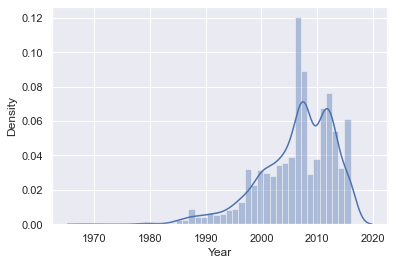

In [101]:
sns.distplot(data_3 ['Year'])

Note: We can see that the min value starts at a more reasonable value. 

Note: All numerical variables have been cleaned.Lets create a new variable to show this.

In [102]:
data_cleaned = data_4.reset_index(drop = True )
data_cleaned.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3867,3867.00,3867,3867.00,3867.00,3867,3867,3867.00,3867
unique,7,NaN,6,NaN,NaN,4,2,NaN,291
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN,181
mean,NaN,18194.46,NaN,160.54,2.45,NaN,NaN,2006.71,NaN
std,NaN,19085.86,NaN,95.63,0.95,NaN,NaN,6.10,NaN
min,NaN,800.00,NaN,0.00,0.60,NaN,NaN,1988.00,NaN
25%,NaN,7200.00,NaN,91.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11700.00,NaN,157.00,2.20,NaN,NaN,2008.00,NaN
75%,NaN,21700.00,NaN,225.00,3.00,NaN,NaN,2012.00,NaN


### Checking the OLS assumptions

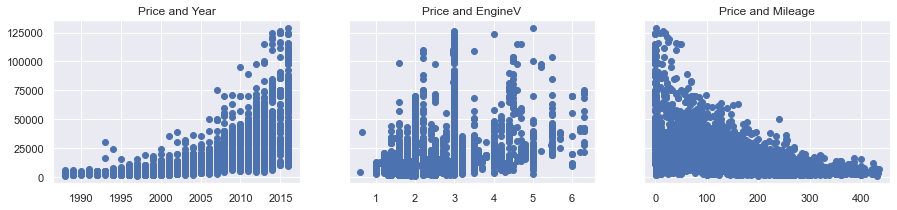

In [103]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

Note: We can spot patterns but definitely not any linear ones. We should not run a linear regression! Or at least not before transforming one or more variables.

### Relaxing the assumption

In [104]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320,8.34
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212,8.97
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500,9.50
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7,10.04
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4,9.81
...,...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.00,van,163,2.50,Diesel,yes,2008,T5 (Transporter),9.35
3863,Toyota,17900.00,sedan,35,1.60,Petrol,yes,2014,Corolla,9.79
3864,Mercedes-Benz,125000.00,sedan,9,3.00,Diesel,yes,2014,S 350,11.74
3865,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999,535,8.78


Note: Now we have 'log_price' lets plot the variables again and see if we get a linear relationship.

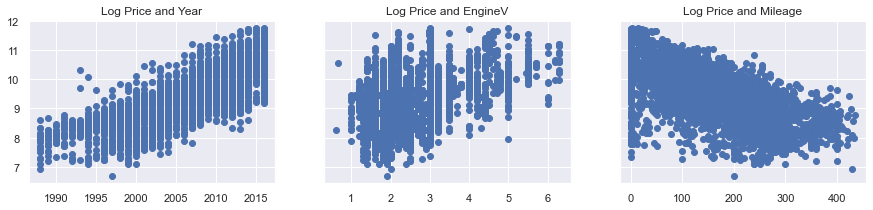

In [105]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')

plt.show()

Note: Awesome! we can clearly see a linear relationship between log price and the three variables.

### Check Regression Assumptions

Note: 1) Linearity - We can see by the graphs above that there is clearly a linear relationship

    2) No Endogeneity- We will look further into this after the regression is created.

    3) Normality and Homoscedasticity- Big sample so normality is assumed. We will include the intercept that can act as a zero mean. We can see by the graphs above that the error term has equal variance 

    4) No Autocorrelation- This is not dealing with time series data so we can safely assume or panel data. No observations are dependent on each other.

    5) No Multicollinearity- It is logical that 'Year' and 'Mileage' will be correlated. We will explore this below.

### Multicollinearity

In [106]:
data_cleaned.columns.values

array(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model', 'log_price'], dtype=object)

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [108]:
variables = data_cleaned[['Mileage', 'Year', 'EngineV']]

In [109]:
vif = pd.DataFrame()
vif["VIF"] =[variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,3.79,Mileage
1,10.35,Year
2,7.66,EngineV


Rule of thumb: VIF E [1, +inf), VIF = 1: no multicollinearity, 1 < VIF < 5: perfectly okay, 10 < VIF: unacceptable

Note: 'Year' is too correlated to the other varibles. However, in the case of mileage and year they are going to be closely related as older cars generally tend to have higher mileage, but you will also find newer cars with high mileage (which will be worth less than newer cars with low mileage) and older cars with very low mileage (which will still be cheap because they're old). if you can't reliably predict the year from the mileage then we shouldn't be throwing it out of the model. Therefore we will keep 'Year'

### Create dummy variables

Note: If we have N categories for a feature we have to create N-1 dummies.

In [110]:
data_with_dummies = pd.get_dummies(data_cleaned, drop_first = True)
data_with_dummies.head()

,Price,Mileage,EngineV,Year,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,4200.00,277,2.00,1991,8.34,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7900.00,427,2.90,1999,8.97,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13300.00,358,5.00,2003,9.50,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23000.00,240,4.20,2007,10.04,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18300.00,120,2.00,2011,9.81,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Rearrange a bit  

In [111]:
data_with_dummies.columns.values

array(['Price', 'Mileage', 'EngineV', 'Year', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_11', 'Model_116', 'Model_118', 'Model_120',
       'Model_19', 'Model_190', 'Model_200', 'Model_210', 'Model_220',
       'Model_230', 'Model_25', 'Model_250', 'Model_300', 'Model_316',
       'Model_318', 'Model_320', 'Model_323', 'Model_325', 'Model_328',
       'Model_330', 'Model_335', 'Model_4 Series Gran Coupe', 'Model_428',
       'Model_4Runner', 'Model_5 Series', 'Model_5 Series GT',
       'Model_520', 'Model_523', 'Model_524', 'Model_525', 'Model_528',
       'Model_530', 'Model_535', 'Model_540', 'Model_545', 'Model_550',
       'Model_6 Series Gran Coupe', 'Model_630', 'Model_640', 'Model_645',
       'Mode

In [112]:
cols = ['Price', 'log_price', 'Mileage', 'EngineV', 'Year', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_11', 'Model_116', 'Model_118', 'Model_120',
       'Model_19', 'Model_190', 'Model_200', 'Model_210', 'Model_220',
       'Model_230', 'Model_25', 'Model_250', 'Model_300', 'Model_316',
       'Model_318', 'Model_320', 'Model_323', 'Model_325', 'Model_328',
       'Model_330', 'Model_335', 'Model_4 Series Gran Coupe', 'Model_428',
       'Model_4Runner', 'Model_5 Series', 'Model_5 Series GT',
       'Model_520', 'Model_523', 'Model_524', 'Model_525', 'Model_528',
       'Model_530', 'Model_535', 'Model_540', 'Model_545', 'Model_550',
       'Model_6 Series Gran Coupe', 'Model_630', 'Model_640', 'Model_645',
       'Model_650', 'Model_730', 'Model_735', 'Model_740', 'Model_745',
       'Model_750', 'Model_760', 'Model_80', 'Model_9', 'Model_90',
       'Model_A 140', 'Model_A 150', 'Model_A 170', 'Model_A 180',
       'Model_A1', 'Model_A3', 'Model_A4', 'Model_A4 Allroad', 'Model_A5',
       'Model_A6', 'Model_A6 Allroad', 'Model_A7', 'Model_A8',
       'Model_ASX', 'Model_Amarok', 'Model_Auris', 'Model_Avalon',
       'Model_Avensis', 'Model_Aygo', 'Model_B 170', 'Model_B 180',
       'Model_B 200', 'Model_Beetle', 'Model_Bora', 'Model_C-Class',
       'Model_CL 180', 'Model_CL 500', 'Model_CL 55 AMG', 'Model_CL 550',
       'Model_CL 63 AMG', 'Model_CLA 200', 'Model_CLA 220',
       'Model_CLA-Class', 'Model_CLC 180', 'Model_CLC 200',
       'Model_CLK 200', 'Model_CLK 220', 'Model_CLK 230', 'Model_CLK 240',
       'Model_CLK 280', 'Model_CLK 320', 'Model_CLK 430', 'Model_CLS 350',
       'Model_CLS 400', 'Model_CLS 500', 'Model_CLS 63 AMG',
       'Model_Caddy', 'Model_Camry', 'Model_Captur', 'Model_Caravelle',
       'Model_Carina', 'Model_Carisma', 'Model_Celica', 'Model_Clio',
       'Model_Colt', 'Model_Corolla', 'Model_Corolla Verso',
       'Model_Cross Touran', 'Model_Dokker', 'Model_Duster',
       'Model_E-Class', 'Model_Eclipse', 'Model_Eos', 'Model_Espace',
       'Model_FJ Cruiser', 'Model_Fluence', 'Model_Fortuner',
       'Model_G 320', 'Model_G 350', 'Model_G 500', 'Model_G 55 AMG',
       'Model_G 63 AMG', 'Model_GL 320', 'Model_GL 350', 'Model_GL 420',
       'Model_GL 450', 'Model_GL 500', 'Model_GL 550', 'Model_GLC-Class',
       'Model_GLE-Class', 'Model_GLK 220', 'Model_GLK 300',
       'Model_GLS 350', 'Model_GLS 400', 'Model_Galant', 'Model_Golf GTI',
       'Model_Golf II', 'Model_Golf III', 'Model_Golf IV',
       'Model_Golf Plus', 'Model_Golf V', 'Model_Golf VI',
       'Model_Golf VII', 'Model_Golf Variant', 'Model_Grand Scenic',
       'Model_Grandis', 'Model_Hiace', 'Model_Highlander', 'Model_Hilux',
       'Model_I3', 'Model_IQ', 'Model_Jetta', 'Model_Kangoo',
       'Model_Koleos', 'Model_L 200', 'Model_LT', 'Model_Laguna',
       'Model_Lancer', 'Model_Lancer Evolution', 'Model_Lancer X',
       'Model_Lancer X Sportback', 'Model_Land Cruiser 100',
       'Model_Land Cruiser 105', 'Model_Land Cruiser 200',
       'Model_Land Cruiser 76', 'Model_Land Cruiser 80',
       'Model_Land Cruiser Prado', 'Model_Latitude', 'Model_Logan',
       'Model_Lupo', 'Model_M5', 'Model_M6', 'Model_MB', 'Model_ML 250',
       'Model_ML 270', 'Model_ML 280', 'Model_ML 320', 'Model_ML 350',
       'Model_ML 400', 'Model_ML 430', 'Model_ML 500', 'Model_ML 550',
       'Model_ML 63 AMG', 'Model_Master', 'Model_Matrix', 'Model_Megane',
       'Model_Modus', 'Model_Multivan', 'Model_New Beetle',
       'Model_Outlander', 'Model_Outlander XL', 'Model_Pajero',
       'Model_Pajero Pinin', 'Model_Pajero Sport', 'Model_Pajero Wagon',
       'Model_Passat B3', 'Model_Passat B4', 'Model_Passat B5',
       'Model_Passat B6', 'Model_Passat B7', 'Model_Passat B8',
       'Model_Passat CC', 'Model_Phaeton', 'Model_Pointer', 'Model_Polo',
       'Model_Previa', 'Model_Prius', 'Model_Q3', 'Model_Q5', 'Model_Q7',
       'Model_R 320', 'Model_R8', 'Model_Rav 4', 'Model_S 140',
       'Model_S 250', 'Model_S 300', 'Model_S 320', 'Model_S 350',
       'Model_S 400', 'Model_S 430', 'Model_S 500', 'Model_S 550',
       'Model_S 600', 'Model_S 63 AMG', 'Model_S 65 AMG', 'Model_S4',
       'Model_S5', 'Model_S8', 'Model_SL 500 (550)', 'Model_SL 55 AMG',
       'Model_SLK 200', 'Model_SLK 350', 'Model_Sandero',
       'Model_Sandero StepWay', 'Model_Scenic', 'Model_Scion',
       'Model_Scirocco', 'Model_Sequoia', 'Model_Sharan', 'Model_Sienna',
       'Model_Smart', 'Model_Space Star', 'Model_Space Wagon',
       'Model_Sprinter 208', 'Model_Sprinter 210', 'Model_Sprinter 211',
       'Model_Sprinter 212', 'Model_Sprinter 213', 'Model_Sprinter 311',
       'Model_Sprinter 312', 'Model_Sprinter 313', 'Model_Sprinter 315',
       'Model_Sprinter 316', 'Model_Sprinter 318', 'Model_Sprinter 319',
       'Model_Symbol', 'Model_Syncro', 'Model_T3 (Transporter)',
       'Model_T4 (Transporter)', 'Model_T4 (Transporter) ',
       'Model_T5 (Transporter)', 'Model_T5 (Transporter) ',
       'Model_T6 (Transporter)', 'Model_T6 (Transporter) ', 'Model_TT',
       'Model_Tacoma', 'Model_Tiguan', 'Model_Touareg', 'Model_Touran',
       'Model_Trafic', 'Model_Tundra', 'Model_Up', 'Model_V 250',
       'Model_Vaneo', 'Model_Vento', 'Model_Venza', 'Model_Viano',
       'Model_Virage', 'Model_Vista', 'Model_Vito', 'Model_X1',
       'Model_X3', 'Model_X5', 'Model_X5 M', 'Model_X6', 'Model_X6 M',
       'Model_Yaris', 'Model_Z3', 'Model_Z4']

In [113]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,Price,log_price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,4200.00,8.34,277,2.00,1991,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7900.00,8.97,427,2.90,1999,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13300.00,9.50,358,5.00,2003,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23000.00,10.04,240,4.20,2007,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18300.00,9.81,120,2.00,2011,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Linear Regression 

### Declare the inputs and the targets 

In [114]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price','Price'], axis = 1) 

### Scale the data

In [115]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [116]:
inputs_scaled = scaler.transform(inputs)

Note: It is not usually recommended to standardize dummy variables. For ML purposes we rarely put too much thought into it because scaling has no effect on the predictive power of dummies. However, it is worth noting that once scaled, they lose all their dummy meaning.

### Train Test Split

In [117]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size = 0.2, random_state = 365)

### Create the regression 

In [118]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [119]:
y_hat = reg.predict(x_train)

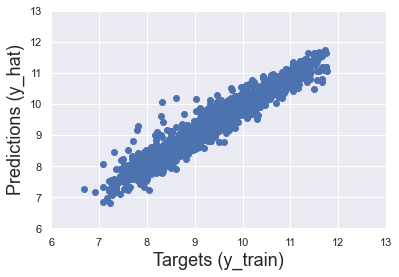

In [120]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size = 18)
plt.ylabel('Predictions (y_hat)', size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

C:\Users\ronni\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

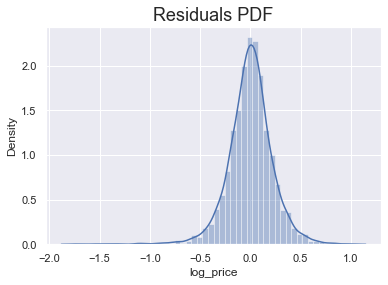

In [121]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size = 18)

Note: Residual = Differences between the targets and the predictions

In [122]:
reg.score(x_train, y_train)
R_Squared = reg.score(x_train, y_train)
R_Squared

0.9332876959284061

Note: R-squared shows that our model is explaining roughly 93% of the variability of the data. Pretty good!

In [123]:
n = x_train.shape[0]

p = x_train.shape[1]

adj_R_Squared = 1-(1-R_Squared)*((n-1)/(n-p-1))
adj_R_Squared

0.925907168035428

Note: adj.R^2 < R^2 by a small amount. This means we were not penalized a lot for the inclusion of independent variables.

### Feature selection

In [124]:
from sklearn.feature_selection import f_regression

In [125]:
p_values = f_regression(x_train, y_train)[1]
p_values.round(3)

C:\Users\ronni\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:294: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) -


array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.012, 0.   , 0.   , 0.   , 0.   , 0.022, 0.02 , 0.   ,
       0.   ,   nan, 0.904, 0.986, 0.147, 0.066, 0.185, 0.018, 0.101,
       0.442, 0.245, 0.004, 0.363, 0.08 , 0.013, 0.   , 0.   ,   nan,
       0.924, 0.688, 0.445, 1.   , 0.098, 0.202,   nan, 0.705, 0.026,
       0.037, 0.179,   nan, 0.   , 0.311, 0.009, 0.048, 0.066,   nan,
       0.008, 0.026, 0.492, 0.   , 0.585, 0.508, 0.487, 0.26 , 0.802,
       0.513, 0.   , 1.   , 0.   , 0.007, 0.147, 0.545, 0.705, 0.   ,
       0.337, 0.855, 0.519, 0.   , 0.108, 0.   , 0.   , 0.715, 0.003,
       0.131, 0.51 , 0.196, 0.967, 0.827, 0.539, 0.607, 0.976, 0.609,
       0.729, 0.147, 0.055, 0.109, 0.021, 0.344, 0.036, 0.232, 0.016,
       0.119, 0.16 ,   nan, 0.63 , 0.666, 0.096, 0.513, 1.   , 0.807,
       0.508, 0.746,   nan, 0.261, 0.017, 0.079, 0.021, 0.   , 0.032,
       0.472, 0.765, 0.009, 0.001, 1.   , 0.024, 0.008, 0.008, 0.565,
       0.949, 0.702,

### Finding the weights and bias

In [126]:
reg.intercept_

143987077287.37082

In [127]:
reg.coef_

array([-6.84713840e-02,  6.21831358e-02,  5.38295300e-01, -1.76824620e+12,
       -1.90533012e+12, -9.60076122e+11, -3.94926065e+12, -2.51001752e+11,
       -1.91477680e+12,  2.13623047e-03, -3.90625000e-03, -3.27148438e-02,
       -3.51562500e-02, -2.73590088e-02, -3.40576172e-02, -1.06811523e-02,
       -3.90625000e-02,  2.54272461e-01, -2.98789776e+11,  5.45302509e+12,
        2.10800171e-02,  2.82897949e-02, -4.25338745e-03,  1.75749836e+11,
        4.21142578e-02,  4.74548340e-02,  1.43966675e-02,  2.51770020e-02,
        2.80761719e-02,  1.24289977e+11,  1.82952881e-02,  1.06048584e-02,
        3.18069458e-02,  8.78601074e-02,  1.34017944e-01, -8.19347771e+11,
        5.13305664e-02,  5.45501709e-02,  5.87921143e-02,  1.10834796e+12,
        2.20031738e-02,  1.46293640e-02, -4.35599730e+11,  3.05175781e-02,
        4.48379517e-02,  1.72561646e-01,  5.73730469e-02, -3.07027212e+11,
        1.28784180e-01,  7.62023926e-02,  1.23840332e-01,  8.86535645e-02,
        5.03845215e-02,  

In [128]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' %x)
reg_summary = pd.DataFrame(inputs.columns.values, columns = ['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.07
1,EngineV,0.06
2,Year,0.54
3,Brand_BMW,-1768246199049.67
4,Brand_Mercedes-Benz,-1905330124588.12
5,Brand_Mitsubishi,-960076121588.44
6,Brand_Renault,-3949260654428.49
7,Brand_Toyota,-251001751515.70
8,Brand_Volkswagen,-1914776799082.89
9,Body_hatch,0.00


### Testing 

In [129]:
y_hat_test = reg.predict(x_test)

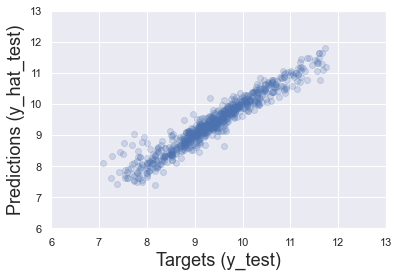

In [130]:
plt.scatter(y_test, y_hat_test, alpha = 0.2)
plt.xlabel('Targets (y_test)', size = 18)
plt.ylabel('Predictions (y_hat_test)', size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [131]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns = ['Predictions'])
df_pf.head()

<ipython-input-131-7d32f10df354>:1: RuntimeWarning: overflow encountered in exp
  df_pf = pd.DataFrame(np.exp(y_hat_test), columns = ['Predictions'])


,Predictions
0,8370.26
1,inf
2,2029.30
3,6663.58
4,9134.76


In [132]:
maxVal = 1500000
df_pf['Predictions'].where(df_pf['Predictions'] <= maxVal, maxVal, True)
df_pf['Target'] = np.exp(y_test) 
df_pf.head()

,Predictions,Target
0,8370.26,NaN
1,1500000.00,7900.00
2,2029.30,NaN
3,6663.58,NaN
4,9134.76,NaN


Note: Since we are picking the maximum of the dataset, a car cannot cost more than this.
    If a car costs, $150,000, then it is the maximum of the dataset. In this case we binded the inf+ to this number instead. 

In [133]:
y_test = y_test.reset_index(drop = True)
y_test.head()

0   7.74
1   7.94
2   7.82
3   8.76
4   9.12
Name: log_price, dtype: float64

In [134]:
df_pf['Target'] = np.exp(y_test)
df_pf.head()

,Predictions,Target
0,8370.26,2300.00
1,1500000.00,2800.00
2,2029.30,2500.00
3,6663.58,6400.00
4,9134.76,9150.00


In [135]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Predictions']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Predictions,Target,Residual,Difference%
0,8370.26,2300.00,-6070.26,263.92
1,1500000.00,2800.00,-1497200.00,53471.43
2,2029.30,2500.00,470.70,18.83
3,6663.58,6400.00,-263.58,4.12
4,9134.76,9150.00,15.24,0.17
5,1500000.00,20000.00,-1480000.00,7400.00
6,1500000.00,38888.00,-1461112.00,3757.23
7,20605.62,16999.00,-3606.62,21.22
8,12935.66,12500.00,-435.66,3.49
9,46685.56,41000.00,-5685.56,13.87


In [136]:
df_pf.describe()

,Predictions,Target,Residual,Difference%
count,774.00,774.00,774.00,774.00
mean,43972.68,18165.82,-25806.87,416.57
std,198507.93,19967.86,198460.72,4132.86
min,0.00,1200.00,-1498200.00,0.01
25%,6665.21,6900.00,-1503.10,5.66
50%,11522.08,11600.00,34.91,12.92
75%,21869.08,20500.00,1335.31,24.33
max,1500000.00,126000.00,64994.21,83233.33
